
"""
More Variables :

Total Races from current race
- Races in the last 7/14/28/60/90/180/365/730 days 
- Races won in the 7/14/28/60/90/180/365/730 days
- Races placed in the 7/14/28/60/90/180/365/730 days


"""


# Import the code 


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:
DEBUG = True

In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:

# Importing Dog Race Results

#res_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\dog_results_20211201_20211231.csv')
#df.res_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\dog_results_20220101_20220531.csv')

print(f'{fileloc}/dog_results_2022Q1_2022Q2.csv')

df.res_raw_2021Q1Q4 = pd.read_csv(f'{fileloc}/dog_results_2021Q1_2021Q4.csv')
print(df.res_raw_2021Q1Q4.columns.values.tolist())
print(df.res_raw_2021Q1Q4.shape)

df.res_raw_2022Q1Q2 = pd.read_csv(f'{fileloc}/dog_results_2022Q1_2022Q2.csv')
print(df.res_raw_2022Q1Q2.columns.values.tolist())
print(df.res_raw_2022Q1Q2.shape)



/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/dog_results_2022Q1_2022Q2.csv
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(435715, 19)
['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(320052, 19)


In [8]:

df.res_raw = df.res_raw_2021Q1Q4.append( df.res_raw_2022Q1Q2 )
print(df.res_raw.columns.values.tolist())
print(df.res_raw.shape)


['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
(755767, 19)


In [9]:

df.res_raw.loc[:,"DogName"] = df.res_raw["DogName"].str.replace("'","").str.replace(".","")
if DEBUG: print(df.res_raw.shape) 
# 320 052

#if DEBUG: res_raw[ ~(res_raw.Place.isin( ['D','F','N','R','S','T',''])) ].shape # 66608
if DEBUG: print(df.res_raw[ ~(df.res_raw.Place.isin( ['R','S'])) ].shape) 
# 275 864

df.res_raw2 = df.res_raw[ ~(df.res_raw.Place.isin( ['R','S']))  ]
df.res_ = df.res_raw2[~df.res_raw2.Place.isna()]
if DEBUG: print(df.res_.shape) 
# 273 735

del df.res_raw, df.res_raw2

#res_ = res_raw


(755767, 19)
(649399, 19)
(644761, 19)


In [10]:

# Importing Race Details 

#race_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\race_details_20211201_20211231.csv', parse_dates = True)
#df.race_raw = pd.read_csv('C:\\Users\\karan\\Documents\\Data\\racing\\FastTrack\\Past\\race_details_20220101_20220531.csv', parse_dates = True)

print(f'{fileloc}/race_details_2022Q1_2022Q2.csv')

df.race_raw_2022Q1Q2 = pd.read_csv(f'{fileloc}/race_details_2022Q1_2022Q2.csv', parse_dates = True)
print(df.race_raw_2022Q1Q2.columns.values.tolist())
print(df.race_raw_2022Q1Q2.shape)

df.race_raw_2021Q1Q4 = pd.read_csv(f'{fileloc}/race_details_2021Q1_2021Q4.csv', parse_dates = True)
print(df.race_raw_2021Q1Q4.columns.values.tolist())
print(df.race_raw_2021Q1Q4.shape)


/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/race_details_2022Q1_2022Q2.csv
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(38562, 8)
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(51833, 8)


In [11]:

df.race_raw = df.race_raw_2021Q1Q4.append( df.race_raw_2022Q1Q2 )
print(df.race_raw.columns.values.tolist())
print(df.race_raw.shape)


['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date']
(90395, 8)


In [12]:

df.race_raw['Event_Dt'] = pd.to_datetime(df.race_raw['date']).dt.date

#dtvalct = race_raw.Event_Dt.value_counts()

df.race_raw.loc[df.race_raw.Track.isin(['Murray Bridge (MBR)','Murray Bridge (MBS)']), "Track"] = 'Murray Bridge'
df.race_raw.loc[df.race_raw.Track.isin(['Richmond (RIS)']), "Track"] = 'Richmond'

df.race_raw.loc[df.race_raw.Track.isin(['Sandown (SAP)']), "Track"] = 'Sandown Park'

df.race_raw.loc[df.race_raw.Track.isin(['Meadows (MEP)']), "Track"] = 'Meadows'
df.race_raw.loc[df.race_raw.Track.isin(['The Meadows']), "Track"] = 'Meadows'


if DEBUG : print(df.race_raw.shape)

# 2021
# 52,103 Races

# 2022 upto May
# 21,002 Races

# 2022 Q1/Q2
# 38,562 Races

# 2022 Q1/Q2 + 2021 Q1/Q2/Q3/Q4
# 81,412 Races

df.race_ = df.race_raw[ ~df.race_raw.Track.str.contains('NZ')]

if DEBUG : print(df.race_.shape)

del df.race_raw

if DEBUG: print(df.race_.dtypes)



(90395, 9)
(81412, 9)
@id           int64
RaceNum       int64
RaceName     object
RaceTime     object
Distance     object
RaceGrade    object
Track        object
date         object
Event_Dt     object
dtype: object


In [13]:

if DEBUG:
    print(df.res_.columns.values.tolist())
    print(df.race_.columns.values.tolist())
    
    print(df.res_.shape)
    print(df.race_.shape)

df.ft = pd.merge(df.res_, df.race_, left_on = 'RaceId', right_on = '@id', how = 'inner', suffixes=('_DOG', '_RACE'))
if DEBUG: print(df.ft.shape)

# 2021
# 333,285

# 2022 upto May
# 132,558

# 2022 Q1/Q2
# 245,827

# 2022 Q1/Q2 + 2021 Q1/Q2/Q3/Q4
# 245,827

#qc_DogName = df.ft_merg.DogName.value_counts()


['@id', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName']
['@id', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt']
(644761, 19)
(81412, 9)
(577317, 28)


In [14]:

#summ.ft = hd.describe_df(df.ft)


### Prepare the Base Dataset

In [15]:

print(df.ft.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt']


In [16]:

#Clean the fast track prices
df.ft['ft_sp'] = df.ft.StartPrice.apply(lambda x : float(str(x).replace("$","").replace("F","")) )


In [17]:

print( pd.DataFrame(df.ft['Place'].value_counts()).transpose() )

place_to_remove = ['F','T','N','P','B','D']


           1      2      3      4      5      6      7      8     F     T    N   3=   4=   2=   5=   1=   6=    P   7=   B   D
Place  80621  80259  80031  79721  78416  72837  58238  38959  3402  1199  998  476  423  416  373  306  271  222  114  21  14


In [48]:

df.ft['x_margin'] = df.ft['Margin1']

print(df.ft['x_margin'].isna().sum())


print(len(races_excl_margin))


6007
19


In [57]:

# Delete races where ft_sp is blank
all_races = df.ft['@id_RACE'].unique().tolist()
print(len(all_races))
print()


# Part 1 - Removing Races with missing fast track prices - can't be measured for performance
blank_ft_sp_races = df.ft[df.ft['ft_sp'].isna()]['@id_RACE'].unique().tolist()
#print(len(blank_ft_sp_races))
df_base0 = df.ft[ ( ~df.ft['@id_RACE'].isin(blank_ft_sp_races) ) ]
print(f"Shape : {df_base0.shape}, Races : {len(df_base0['@id_RACE'].unique().tolist())}, Race w missing fast track prices : {len(blank_ft_sp_races)}")
print()


# Part 2 - Removing Races with no Missing Place Information
races_excl_pos = df_base0[df_base0['Place'].isin(place_to_remove)]['@id_RACE'].unique().tolist()
#print(len(races_excl_pos))

df_base1 = df_base0[ ( ~df_base0['@id_RACE'].isin(races_excl_pos) ) ]
print(f"Shape : {df_base1.shape}, Races : {len(df_base1['@id_RACE'].unique().tolist())}, Races w missing Place : {len(races_excl_pos)}")
print()

# Part 3 - Removing Races with no Missing Margin1 information
races_excl_margin = df_base1[df_base1['Margin1'].isna()]['@id_RACE'].unique().tolist()
#print(len(races_excl_margin))

df_base = df_base1[ ( ~df_base1['@id_RACE'].isin(races_excl_margin) ) ]
print(f"Shape : {df_base.shape}, Races : {len(df_base['@id_RACE'].unique().tolist())}, Races w missing Margin : {len(races_excl_margin)}")

del df_base0, df_base1


80909

Shape : (569648, 30), Races : 79518, Race w missing fast track prices : 1391

Shape : (541552, 30), Races : 75740, Races w missing Place : 3778

Shape : (541527, 30), Races : 75721, Races w missing Margin : 19


In [55]:
df_base.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)

/tmp/ipykernel_8676/1959676617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)


In [58]:

#df_base0[df_base0.DogName.isin(['FOURTH DIMENTION'])].head()
df_base[df_base['@id_RACE'].isin([631783547]) ]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,RunTime,Prizemoney,RaceId,TrainerId,TrainerName,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,ft_sp,x_margin
11599,314053857,1,PARUMBA BARCIA,6.0,6,30.2,$14.50,NaN,0.39,NaN,M/11,1,NaN,8.29,22.72,NaN,631783547,132501,E Lieshout,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.5,0.39
11600,114244064,2,FOURTH DIMENTION,3.0,3,33.4,$4.20,NaN,0.39,0.39,M/22,1,NaN,8.36,22.75,NaN,631783547,131578,P Pollutro,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,4.2,0.39
11601,157829531,3,TUI,4.0,4,29.3,$8.50,NaN,3.60,3.21,M/43,4,NaN,8.47,22.97,NaN,631783547,110965,C Haigh,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,8.5,3.60
11602,190918076,4,BANJO PLATO,8.0,8,33.1,$14.10,NaN,5.36,1.76,S/75,0,NaN,8.64,23.10,NaN,631783547,65076,D Belsham,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.1,5.36
11603,184236240,5,CEE JAY ACE,1.0,1,33.0,$2.80F,NaN,7.59,2.23,S/86,1,NaN,8.73,23.25,NaN,631783547,283109,L Dalziel,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,2.8,7.59
11604,164415675,6,BIG PLANS,2.0,2,39.7,$9.10,NaN,8.80,1.21,M/68,0,NaN,8.62,23.34,NaN,631783547,255489,K Thorburn,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,9.1,8.80
11605,224008138,7,HEIDI INTENTION,7.0,7,25.7,$6.20,NaN,14.94,6.14,M/57,11,NaN,8.48,23.77,NaN,631783547,27599,J Caley,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,6.2,14.94
11606,340020191,8,HURRICANE PETE,5.0,5,32.7,$18.10,NaN,16.19,1.24,M/34,15,NaN,8.43,23.85,NaN,631783547,69852,J Sultana,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,18.1,16.19


In [59]:

# Fix the position Variable
df_base['position'] = df_base.Place.apply(lambda x : x.replace("=","") if x in ['1=','2=','3=','4=','5=','6=','7=','8='] else x)
print(pd.DataFrame(df_base.position.value_counts()).transpose())

df_base['x_margin'].plot(kind = 'density', figsize = (24,8))


              1      2      3      4      5      6      7      8
position  75867  75776  75704  75507  74453  69445  55908  38867


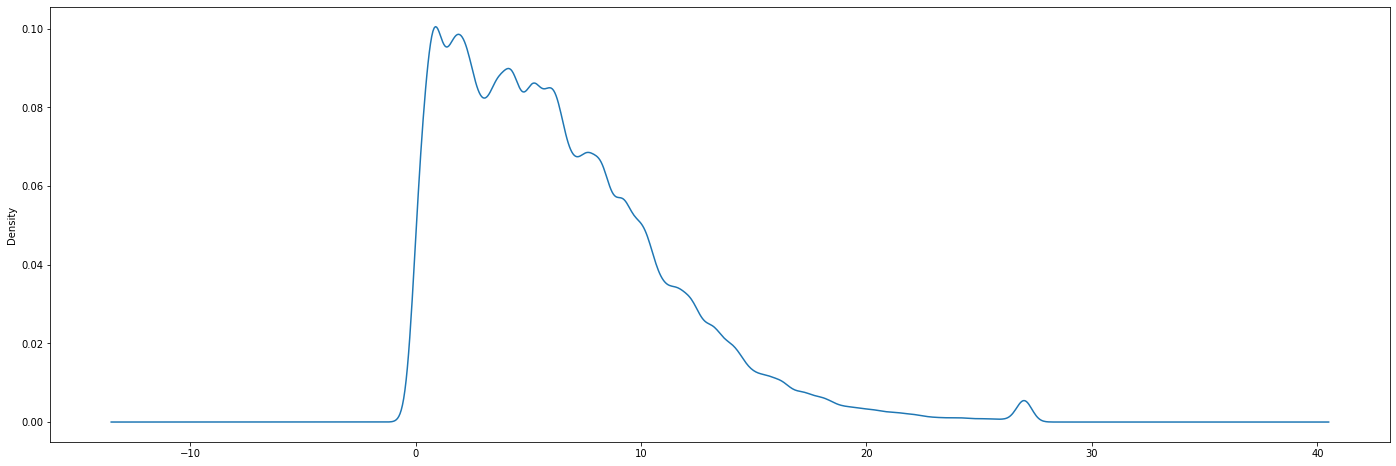

In [90]:

# Fix the Margin variables - is the same for 1 and 2
df_base['y_margin'] = df_base.apply(lambda x : 0 if x.position == 1' else 27 if x.Margin1 > 27 else x.Margin1, axis = 1) # capping at 99%ile of Margin1

df_base['y_margin'].plot(kind = 'density', figsize = (24,8))


In [91]:

# Checking the 99 percentile of the x_margin variable

#from scipy import stats
#stats.percentileofscore(df_base['x_margin'].values, 15, kind='mean')



In [89]:

df_base.describe()


,@id_DOG,Box,Rug,Weight,Handicap,Margin1,Margin2,Checks,SplitMargin,RunTime,Prizemoney,RaceId,TrainerId,@id_RACE,RaceNum,ft_sp,x_margin,y_margin
count,5.415270e+05,541527.000000,541527.000000,541526.000000,0.0,541527.000000,465660.000000,541527.000000,450447.000000,541527.000000,373048.000000,5.415270e+05,541527.000000,5.415270e+05,541527.000000,541527.000000,541527.000000,541527.000000
mean,4.525605e+08,4.475856,4.581820,29.920781,NaN,6.437372,2.068105,0.573480,7.303398,24.428120,428.506811,7.292575e+08,109679.896943,7.292575e+08,6.150947,16.918145,6.401880,6.365399
std,1.121930e+08,2.346395,2.433652,3.323096,NaN,8.956424,8.143261,1.643572,2.527027,4.983884,3005.574457,5.831641e+07,76370.986094,5.831641e+07,3.278919,20.995738,5.071521,4.828912
min,1.083910e+08,1.000000,1.000000,18.900000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,6.238619e+08,1.000000,0.260000,0.000000,0.000000
25%,3.836042e+08,2.000000,2.000000,27.200000,NaN,2.500000,0.570000,0.000000,5.500000,20.550000,0.000000,6.802578e+08,65369.000000,6.802578e+08,3.000000,4.200000,2.500000,2.500000
50%,4.517679e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.410000,0.000000,6.790000,23.540000,20.000000,7.293859e+08,99417.000000,7.293859e+08,6.000000,8.700000,5.500000,5.500000
75%,5.271657e+08,7.000000,7.000000,32.500000,NaN,9.000000,2.690000,0.000000,8.770000,27.190000,420.000000,7.792436e+08,123131.000000,7.792436e+08,9.000000,20.600000,9.000000,9.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.292517e+08,335222.000000,8.292517e+08,18.000000,999.990000,51.000000,31.000000


In [92]:

# Add the num_dogs variable (after cleaning up the races OFCOURSE!)

df_num_dogs = df_base.groupby("@id_RACE").agg( { '@id_DOG':'nunique' } ).reset_index().rename(columns = {'@id_DOG':'x_num_dogs'})
print(df_base.shape)

df_base_mg = pd.merge(df_base, df_num_dogs, on = ["@id_RACE"], how = 'left')

print(df_base_mg.shape)
print(df_base_mg.columns.values.tolist())


(541527, 32)
(541527, 33)
['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_margin', 'position', 'y_margin', 'x_num_dogs']


In [93]:

# Top 3 Actuals

##
groupings = ['@id_RACE']

# Actual Result
df_base_mg['Winner_actual'] = df_base_mg.apply(lambda x : 1 if int(x.position) ==1 else 0, axis = 1)
df_base_mg['Top3_actual'] = df_base_mg.apply(lambda x : 1 if int(x.position) <=3 else 0, axis = 1)


In [94]:

# Random Position 
##
groupings = ['@id_RACE']

import random
#print(random.uniform(0, 1))

df_base_mg['rand_mean'] = 0.5
df_base_mg['rand_uniform'] = np.random.normal( df_base_mg['rand_mean'] )

## Rank from the random variables 
df_base_mg["position_random"] = df_base_mg.groupby(groupings)["rand_uniform"].rank("dense", ascending=False)

# Winner / Place Columns
df_base_mg['Winner_random'] = df_base_mg.apply(lambda x : 1 if x.position_random <= 1 else 0, axis = 1)
df_base_mg['Top3_random'] = df_base_mg.apply(lambda x : 1 if x.position_random <= 3 else 0, axis = 1)

print(datetime.now())


2022-11-25 23:50:23.368627


In [95]:

##
groupings = ['@id_RACE']

## Rank for Place Preds
df_base_mg["position_fasttrack"] = df_base_mg.groupby(groupings)["ft_sp"].rank("dense", ascending=True)

# Winner / Place Columns
df_base_mg['Winner_fastrack'] = df_base_mg.apply(lambda x : 1 if x.position_fasttrack <= 1 else 0, axis = 1)
df_base_mg['Top3_fastrack'] = df_base_mg.apply(lambda x : 1 if x.position_fasttrack <= 3 else 0, axis = 1)

print(datetime.now())


2022-11-25 23:50:34.214443


In [96]:

print(pd.DataFrame(df_base_mg.isna().sum()).transpose())


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  RunTime  Prizemoney  RaceId  TrainerId  TrainerName  @id_RACE  RaceNum  \
0        0      0        0    0    0       1           0    541527        0    75867  72202       0    261968        91080        0      168479       0          0            0         0        0   

   RaceName  RaceTime  Distance  RaceGrade  Track  date  Event_Dt  ft_sp  x_margin  position  y_margin  x_num_dogs  Winner_actual  Top3_actual  rand_mean  rand_uniform  position_random  \
0        15         0         0          0      0     0         0      0         0         0         0           0              0            0          0             0                0   

   Winner_random  Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  
0              0            0                   0                0              0  


In [97]:

df_base_mg.agg({'TrainerName':'nunique', 'Track':'nunique', 'DogName':'nunique'})


TrainerName     3540
Track             58
DogName        25327
dtype: int64

In [98]:
pd.set_option('display.max_rows', 50)

In [99]:

tracks_unq = df_base_mg.Track.unique().tolist()

print(type(tracks_unq))

tracks_unq.sort()

print(tracks_unq)


<class 'list'>
['Albion Park', 'Angle Park', 'Ballarat', 'Bathurst', 'Bendigo', 'Broken Hill', 'Bulli', 'Bundaberg', 'Cannington', 'Capalaba', 'Casino', 'Coonamble', 'Cranbourne', 'Dapto', 'Darwin', 'Devonport', 'Dubbo', 'Gawler', 'Geelong', 'Gosford', 'Goulburn', 'Grafton', 'Gunnedah', 'Healesville', 'Hobart', 'Horsham', 'Ipswich', 'Kempsey', 'Launceston', 'Lismore', 'Lithgow', 'Maitland', 'Mandurah', 'Meadows', 'Moree', 'Mount Gambier', 'Murray Bridge', 'Muswellbrook', 'Northam', 'Nowra', 'Potts Park', 'Richmond', 'Rockhampton', 'Sale', 'Sandown Park', 'Shepparton', 'Tamworth', 'Taree', 'Temora', 'The Gardens', 'Townsville', 'Traralgon', 'Wagga', 'Warragul', 'Warrnambool', 'Wauchope', 'Wentworth Park', 'Young']


In [100]:

print(datetime.now().date())


2022-11-25


In [101]:

print(df_base_mg.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'RunTime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_margin', 'position', 'y_margin', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack']


In [102]:

print(df_base_mg.position.value_counts())


1    75867
2    75776
3    75704
4    75507
5    74453
6    69445
7    55908
8    38867
Name: position, dtype: int64


In [106]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random', 'RaceGrade', 'Track']

cols_for_drop = [ 'Place', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin' \
                 , 'Prizemoney', 'TrainerId', 'TrainerName', 'RaceNum', 'RaceName', 'RaceTime', 'date' \
                 , 'rand_mean', 'rand_uniform', 'x_margin']

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'dataset_base_{todaydt}.csv'

exp_ds = df_base_mg.drop( columns = cols_for_drop ).rename( columns = { 'RunTime' : 'y_runtime' } )
exp_ds['y_pos'] = exp_ds['position'].astype(int)



In [107]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'y_margin', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos']


In [108]:

exp_ds.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,position,y_margin,x_num_dogs,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos
0,461066431,QWARA BALE,22.61,627929853,627929853,400m,Maiden Heat,Geelong,2021-01-01,4.2,1,4.71,6,1,1,2.0,0,1,2.0,0,1,1
1,427155606,OREO LADY,22.94,627929853,627929853,400m,Maiden Heat,Geelong,2021-01-01,19.3,2,4.71,6,0,1,3.0,0,1,5.0,0,0,2
2,451716138,BLAZING DEMON,22.98,627929853,627929853,400m,Maiden Heat,Geelong,2021-01-01,4.5,3,5.23,6,0,1,4.0,0,0,3.0,0,1,3
3,313105463,STATLER,23.24,627929853,627929853,400m,Maiden Heat,Geelong,2021-01-01,4.1,4,9.00,6,0,0,1.0,1,1,1.0,1,1,4
4,426172144,BILL BOB LAD,23.30,627929853,627929853,400m,Maiden Heat,Geelong,2021-01-01,4.1,5,9.84,6,0,0,5.0,0,0,1.0,1,1,5


In [105]:

exp_ds.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,x_margin,x_num_dogs,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos
count,5.415270e+05,541527.000000,5.415270e+05,5.415270e+05,541527.000000,541527.000000,541527.000000,541527.000000,541527.000000,541527.000000,541527.000000,541527.000000,541527.000000,541527.000000,541527.000000,541527.000000
mean,4.525605e+08,24.428120,7.292575e+08,7.292575e+08,16.918145,6.437372,7.305706,0.140098,0.419826,4.152853,0.139829,0.419416,4.014038,0.145481,0.437614,4.150829
std,1.121930e+08,4.983884,5.831641e+07,5.831641e+07,20.995738,8.956424,0.949691,0.347089,0.493531,2.159882,0.346810,0.493464,2.088609,0.352586,0.496093,2.160011
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3.836042e+08,20.550000,6.802578e+08,6.802578e+08,4.200000,2.500000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
50%,4.517679e+08,23.540000,7.293859e+08,7.293859e+08,8.700000,5.500000,8.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000
75%,5.271657e+08,27.190000,7.792436e+08,7.792436e+08,20.600000,9.000000,8.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000
max,2.145360e+09,396.120000,8.292517e+08,8.292517e+08,999.990000,5229.500000,8.000000,1.000000,1.000000,8.000000,1.000000,1.000000,8.000000,1.000000,1.000000,8.000000


In [43]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [44]:

print('THE END')


THE END
